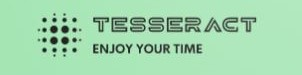

The following notebook will execute several sql querys to get a better understanding of some insights that could be investigated

In [1]:
import os
import sys
import sqlalchemy as db
from sqlalchemy.exc import ProgrammingError

class Database():
    """
    Class Database, its used to stabish the connection to the postgresql server

    """

    def __init__(self, user: str, password: str, host: str, dbname: str) -> object:
        """__init__ Instance method to create a database object

        :param user: ddbb username
        :type user: str
        :param password: ddbb password
        :type password: str
        :param host: ddbb host
        :type host: str
        :param dbname: name of the database
        :type dbname: str
        :return: database object
        :rtype: object
        """
        self.user = user
        self.password = password
        self.host = host
        self.dbname = dbname
        # Create engine and connection
        try:
            self.engine = db.create_engine(f"postgresql://{self.user}:{self.password}@{self.host}/{self.dbname}")
            self.connection = self.engine.connect()
            
        except Exception as b:
            print("ERROR")
            

    def fetchByTable(self, t_name: str) -> list:
        """fetchByTable Method to print all the rows from a specific table

        :param t_name: name of the table to be fetched
        :type t_name: str
        """
        # Run selected query and print all the outputs
        list_toreturn = []
        try:
            fetchQuery = self.connection.execute(f"SELECT * FROM {t_name}")
            for data in fetchQuery.fetchall():
                list_toreturn.append(data)
                print(data)
            
            return list_toreturn
        except ProgrammingError as a:
            print("ERROR") 
            

    def bulkInsert(self, dfname: object, t_name: str) -> bool:
        """bulkInsert Method to bulk insert a dataframe into a table

        :param dfname: dataframe that contains the data to insert
        :type dfname: object
        :param t_name: table name that is going to be used to insert
        :type t_name: str
        :return: True value if ended successfully , False in case that fails
        :rtype: bool
        """

        # Replace dataframe index by the first column
        dfname = dfname.set_index(dfname.columns[0])
        try:
            with self.engine.begin() as connection:
                dfname.to_sql(t_name, con=connection, if_exists='append')
            
            return True
        except ProgrammingError as a:
            print("ERROR")
            
        except Exception as a:
            print("ERROR")
            

            return False

    def fetchByQuery(self, query: str) -> list:
        """fetchByQuery Method to print all the rows from a specific query

        :param query: query in sql sintax 
        :type t_name: str
        :return: list with all the returned rows
        :rtype: list
        """
        # Run selected query and print all the outputs
        list_toreturn = []
        try:
            fetchQuery = self.connection.execute(query)
            for data in fetchQuery.fetchall():
                list_toreturn.append(data)
                print(data)
            
            return list_toreturn
        except ProgrammingError as a:
            print("ERROR")
            

    def dinorderquery(self, table: str, **kwargs: dict) -> str:
        """dinorderquery Method to set a sql query with order conditions

        :param table: sql query
        :type table: str
        :return: sql query + order conditions
        :rtype: str

        Usage example dinorderquery("Select * from a",column1 = 'ASC', column3 = 'DESC')


        """
        table = table + " order by "
        for column, value in kwargs.items():
            table = table + column + " " + value + ","
            
        return table[:-1]

    def dinfilterqueryand(self, table: str, **kwargs: dict) -> str:
        """dinfilterqueryand Method to set a sql query with (AND) filtering conditions

        :param table: sql query
        :type table: str
        :return: sql query + filter conditions
        :rtype: str

        Usage example dinfilterqueryand("Select * from a",column1 = '>5 ',column4 = '= \'texttocompair \'')

        """
        # If the table is the result of a query will add the ()
        if "select" in table.lower():
            table = "select * from ("+table + ") as a Where "

        # If the table is a ddbb table will remove the () chars
        else:
            table = "select * from "+table + " as a Where "

        for column, value in kwargs.items():
            table = table + column + " " + value + "AND "
            
        return table[:-4]

    def dinfilterqueryor(self, table: str, **kwargs: dict) -> str:
        """dinfilterqueryor Method to set a sql query with (OR) filtering conditions

        :param table: sql query
        :type table: str
        :return: sql query + filter conditions
        :rtype: str

        Usage example dinfilterqueryor("Select * from a",column1 = '>5 ',column4 = '= \'texttocompair \'')
        """

        # If the table is the result of a query will add the ()
        if "select" in table.lower():
            table = "select * from ("+table + ") as b Where "

        # If the table is a ddbb table will remove the () chars
        else:
            table = "select * from "+table + " as b Where "

        for column, value in kwargs.items():
            table = table + column + " " + value + "OR "
            logger_r.debug(f"dinfilterqueryor - columns {column} - values {value}")
        return table[:-3]

In [2]:
import sys
import os
import pandas as pd


user="postgres"
password="laboratorio"
host="localhost"
dbname="DB_company"

db = Database(user,password,host,dbname)



In [3]:
# Order Status , Times , Total of orders < That has an delivery date after the estimated delivery date
query1= "select order_status,count(order_status) as orderoverestimated,(select count(orders) from orders  ) as numberoforders \
from orders o \
where \
order_estimated_delivery_date < order_delivered_customer_date \
group by order_status"

query2 = "select op.payment_type paymenttype,c.customer_city city,count(o.order_id) noforders \
from \
customers c  \
inner join \
orders o \
on o.customer_id = c.customer_id \
inner join \
order_payments op \
on op.order_id = o.order_id \
group by  op.payment_type,c.customer_city  "


query3 = "select op.payment_type paymenttype,c.customer_state  state,count(o.order_id) noforders \
from \
customers c \
inner join \
orders o \
on o.customer_id = c.customer_id \
inner join \
order_payments op \
on op.order_id = o.order_id \
group by  op.payment_type,c.customer_state \
order by state ,noforders desc  "






query4 = "select c.customer_state  state,count(o.order_id) NofOrders \
from \
customers c \
inner join \
orders o  \
on o.customer_id = c.customer_id  \
group by  c.customer_state \
order by NofOrders desc "

query5 = "select c.customer_city  city,count(o.order_id) NofOrders \
from \
customers c  \
inner join \
orders o  \
on o.customer_id = c.customer_id  \
group by  c.customer_city \
order by NofOrders desc "


query6 = " select s.seller_state  state,count(o.order_id) NofOrders \
from \
sellers s  \
inner join \
order_items oi   \
on oi.seller_id = s.seller_id  \
inner join \
orders o \
on oi.order_id = o.order_id \
group by  s.seller_state \
order by NofOrders desc "

query7 = "select s.seller_city  city,count(o.order_id) NofOrders \
from \
sellers s   \
inner join \
order_items oi   \
on oi.seller_id = s.seller_id  \
inner join  \
orders o  \
on oi.order_id = o.order_id  \
group by  s.seller_city \
order by NofOrders desc "

query8 = " select c.customer_state  state,( cast( count(oi.order_id) as FLOAT ) / cast( count( distinct(oi.order_id)) as FLOAT))  NofOrders \
from \
customers c    \
inner join \
orders o  \
on o.customer_id = c.customer_id   \
inner join \
order_items oi  \
on  o.order_id = oi.order_id \
group by  c.customer_state \
order by NofOrders desc "


query9 = "select s.seller_state,p.product_category_name, count(oi.order_id) NofSales, \
( select count(oi.order_id) TotalofSales  \
from \
order_items oi \
inner join \
sellers a  \
on oi.seller_id = a.seller_id  \
where a.seller_state = s.seller_state ) \
from \
products p  \
inner join \
order_items oi  \
on oi.product_id = p.product_id  \
inner join sellers s  \
on s.seller_id = oi.seller_id  \
group by p.product_category_name ,s.seller_state \
order by s.seller_state,NofSales DESC"

query10 = " select p.product_category_name, avg(or2.review_score) as score \
from \
products p \
inner join \
order_items oi \
on \
p.product_id = oi.product_id \
inner join \
order_reviews or2 \
on \
or2.order_id = oi.order_id \
group by p.product_category_name \
order by score desc "

query11 = "select p.product_category_name, avg(or2.review_score) as score, \
( select count(price)+count(freight_value) as avg_totalcost \
from order_items \
inner join \
products p2 \
on p2.product_id = order_items.product_id \
where p2.product_category_name  = p.product_category_name ) \
from \
products p  \
inner join \
order_items oi \
on \
p.product_id = oi.product_id \
inner join \
order_reviews or2 \
on \
or2.order_id = oi.order_id \
group by p.product_category_name \
order by score,avg_totalcost desc "


query12 = "select s.seller_id, avg(or2.review_score) as avg_reviews,count(or2.review_score) as nofreviews \
from \
sellers s \
inner join \
order_items oi  \
on  \
oi.seller_id = s.seller_id  \
inner join order_reviews or2 \
on or2.order_id = oi.order_id \
group by s.seller_id \
order by avg_reviews DESC "

query13 = "select s.seller_state as sstate,c.customer_state as cstate ,avg(o.order_delivered_customer_date - o.order_purchase_timestamp) as avgdeliverytime \
from \
orders o \
inner join  \
customers c \
on \
c.customer_id = o.customer_id  \
inner join \
order_items oi  \
on \
oi.order_id = o.order_id \
inner join \
sellers s \
on \
s.seller_id = oi.seller_id \
group by s.seller_state , c.customer_state "

query14 = "select s.seller_state as sstate,c.customer_state as cstate ,avg(o.order_delivered_customer_date - o.order_purchase_timestamp) as avgdeliverytime \
from \
orders o \
inner join  \
customers c \
on \
c.customer_id = o.customer_id  \
inner join \
order_items oi  \
on \
oi.order_id = o.order_id  \
inner join  \
sellers s  \
on \
s.seller_id = oi.seller_id  \
where s.seller_state  = c.customer_state  \
group by s.seller_state , c.customer_state "

query15="select count(o.order_delivered_customer_date),avg(o.order_estimated_delivery_date-o.order_delivered_customer_date),count(o.order_delivered_customer_date)::FLOAT/(select count(order_delivered_customer_date) from orders)::FLOAT as percentimpact \
from \
orders o  \
where \
o.order_estimated_delivery_date < o.order_delivered_customer_date "

query16 = "select s.seller_state as sstate,c.customer_state as cstate ,avg(o.order_delivered_customer_date - o.order_purchase_timestamp) as avgdeliverytime,avg(or2.review_score) \
from \
orders o \
inner join \
customers c \
on \
c.customer_id = o.customer_id  \
inner join \
order_items oi \
on \
oi.order_id = o.order_id  \
inner join \
sellers s \
on \
s.seller_id = oi.seller_id \
left join \
order_reviews or2 \
on \
o.order_id = or2.order_id \
where s.seller_state  = c.customer_state \
group by s.seller_state , c.customer_state "

query17 = "select s.seller_state as sstate,c.customer_state as cstate ,avg(o.order_delivered_customer_date - o.order_purchase_timestamp) as avgdeliverytime,avg(or2.review_score) \
from \
orders o \
inner join  \
customers c \
on \
c.customer_id = o.customer_id  \
inner join \
order_items oi  \
on \
oi.order_id = o.order_id  \
inner join \
sellers s \
on \
s.seller_id = oi.seller_id \
left join \
order_reviews or2 \
on \
o.order_id = or2.order_id \
where s.seller_state  = c.customer_state \
group by s.seller_state , c.customer_state "


query18 = "select s.seller_state as sstate,c.customer_state as cstate ,avg(o.order_delivered_customer_date - o.order_purchase_timestamp) as avgdeliverytime,avg(or2.review_score) \
from \
orders o \
inner join  \
customers c \
on \
c.customer_id = o.customer_id \
inner join \
order_items oi \
on \
oi.order_id = o.order_id \
inner join \
sellers s \
on \
s.seller_id = oi.seller_id \
left join \
order_reviews or2 \
on \
o.order_id = or2.order_id \
where s.seller_state  != c.customer_state \
group by sstate,cstate"

query19 ="select avg(o.order_delivered_customer_date - o.order_purchase_timestamp) as avgdeliverytime,avg(or2.review_score) score \
from \
orders o \
inner join \
customers c \
on \
c.customer_id = o.customer_id  \
inner join \
order_items oi  \
on \
oi.order_id = o.order_id  \
inner join  \
sellers s  \
on \
s.seller_id = oi.seller_id  \
left join  \
order_reviews or2 \
on \
o.order_id = or2.order_id \
where s.seller_state  = c.customer_state "

query20 = "select c.customer_state,s.seller_state,avg(or2.review_score) as avgreview \
from \
orders o \
inner join \
customers c \
on \
c.customer_id = o.customer_id  \
inner join \
order_items oi \
on \
oi.order_id = o.order_id \
inner join \
sellers s \
on \
s.seller_id = oi.seller_id \
left join \
order_reviews or2 \
on \
o.order_id = or2.order_id \
group by c.customer_state,s.seller_state"

query21 = "select c.customer_state,avg(or2.review_score) as avgreview \
from \
orders o \
inner join \
customers c \
on \
c.customer_id = o.customer_id  \
inner join \
order_items oi \
on \
oi.order_id = o.order_id \
inner join \
sellers s \
on \
s.seller_id = oi.seller_id \
left join \
order_reviews or2 \
on \
o.order_id = or2.order_id \
group by c.customer_state"

query22 = "select s.seller_state,avg(or2.review_score) as avgreview \
from \
orders o \
inner join \
customers c \
on \
c.customer_id = o.customer_id \
inner join \
order_items oi \
on \
oi.order_id = o.order_id \
inner join \
sellers s \
on \
s.seller_id = oi.seller_id \
left join \
order_reviews or2 \
on \
o.order_id = or2.order_id \
group by s.seller_state"


We are going to start this analysis checking whats the geografical distribution of the customers and the sellers

In [79]:
df_customers=db.fetchByQuery("select \
c.customer_state, \
count(c.customer_state) as times,(select count(seller_state) from sellers where seller_state = c.customer_state) as seller_times \
from \
customers c \
group by \
customer_state \
order by \
c.customer_state desc")

df_poblation=pd.DataFrame([("SP",46004000,1964000),("RJ",17309000,693000),("MG",21212000,583000),("RS",11407000,444000),("PR",11515000,417000),("SC",7175000,293000),("BA",14942000,257000),("DF",3135000,249000),("GO",7116000,202000),("PE",9599000,201000),("CE",8870000,157000),("PA",8623000,156000),("MT",3537000,142000),("ES",3982000,125000),("MS",2816000,107000),("AM",4156000,103000),("MA",7134000,102000),("RN",3552000,76000),("AL",3345000,73000),("PB",4103000,60000),("SE",2317000,38000),("PI",3292000,26000),("AC",892000,21000),("TO",1605000,21000),("RO",1803000,19000),("AP",845000,9000),("RR",651000,8000)]).orderby(1)

('TO', 280, 0)
('SP', 41746, 1849)
('SE', 350, 2)
('SC', 3637, 190)
('RS', 5466, 129)
('RR', 46, 0)
('RO', 253, 2)
('RN', 485, 5)
('RJ', 12852, 171)
('PR', 5045, 349)
('PI', 495, 1)
('PE', 1652, 9)
('PB', 536, 6)
('PA', 975, 1)
('MT', 907, 4)
('MS', 715, 5)
('MG', 11635, 244)
('MA', 747, 1)
('GO', 2020, 40)
('ES', 2033, 23)
('DF', 2140, 30)
('CE', 1336, 13)
('BA', 3380, 19)
('AP', 68, 0)
('AM', 148, 1)
('AL', 413, 0)
('AC', 81, 1)


AttributeError: 'DataFrame' object has no attribute 'orderby'

In [4]:
#orders that has been delivered over the estimated time

db.fetchByQuery(query1)

('canceled', 1, 99441)
('delivered', 7826, 99441)


[('canceled', 1, 99441), ('delivered', 7826, 99441)]

The ETA of the products has an 7.8% of error (1 of 12 orders)

The possible canceled orders are not due the time to deliver because its only 1:7827

In [33]:
#top payment methods by city 
table=db.fetchByQuery(query2)
df_table = pd.DataFrame(table)

# Most used debit card * The payment its over the total its not a rate total_debit/total_payments
print("-------------")
print(df_table[df_table[0]=='debit_card'].sort_values(by=2, ascending=False).head())
# Most used credit card * The payment its over the total its not a rate total_credit/total_payments
print("-------------")
print(df_table[df_table[0]=='credit_card'].sort_values(by=2, ascending=False).head())
# Most used credit boleto * The payment its over the total its not a rate total_boleto/total_payments
print("-------------")
print(df_table[df_table[0]=='boleto'].sort_values(by=2, ascending=False).head())
# Most used credit vocher * The payment its over the total its not a rate total_voucher/total_payments
print("-------------")
print(df_table[df_table[0]=='voucher'].sort_values(by=2, ascending=False).head())





('debit_card', 'capao da porteira', 1)
('voucher', 'tres lagoas', 3)
('debit_card', 'afranio', 1)
('voucher', 'almirante tamandare', 2)
('boleto', 'pirapora do bom jesus', 1)
('credit_card', 'taruma', 7)
('boleto', 'antonio carlos', 1)
('boleto', 'ipaba', 1)
('boleto', 'atalanta', 1)
('credit_card', 'itirucu', 3)
('credit_card', 'camutanga', 3)
('credit_card', 'coluna', 2)
('credit_card', 'campo bonito', 1)
('credit_card', 'pimenteiras', 2)
('credit_card', 'sao mateus do sul', 11)
('boleto', 'orleans', 1)
('credit_card', 'severinia', 3)
('boleto', 'tres coroas', 1)
('boleto', 'ubaitaba', 1)
('boleto', 'caxias do sul', 47)
('credit_card', 'mongagua', 30)
('credit_card', 'pendencias', 2)
('boleto', 'olinda', 14)
('boleto', 'pontal', 7)
('voucher', 'palotina', 2)
('credit_card', 'aparecida de sao manuel', 2)
('voucher', 'queimados', 5)
('credit_card', 'gloria do goita', 2)
('boleto', 'nova trento', 1)
('boleto', 'perola independente', 1)
('voucher', 'taboao da serra', 18)
('voucher', 'ita

('credit_card', 'lagoa do mato', 1)
('voucher', 'limoeiro', 1)
('boleto', 'poa', 24)
('voucher', 'jacarei', 14)
('voucher', 'japeri', 1)
('credit_card', 'porto dos gauchos', 1)
('credit_card', 'pacaja', 6)
('boleto', 'catas altas', 2)
('boleto', 'mata', 1)
('credit_card', 'paranaiba', 8)
('credit_card', 'baldim', 2)
('credit_card', 'felicio dos santos', 1)
('boleto', 'santo antonio do leverger', 1)
('credit_card', 'barrolandia', 1)
('debit_card', 'hortolandia', 5)
('credit_card', 'candelaria', 1)
('boleto', 'sao pedro do butia', 1)
('boleto', 'espirito santo do pinhal', 2)
('boleto', 'buriti', 1)
('voucher', 'nhandeara', 1)
('credit_card', 'sarzedo', 13)
('credit_card', 'coronel fabriciano', 33)
('boleto', 'vitoria', 69)
('credit_card', 'sao bentinho', 1)
('credit_card', 'nazareno', 2)
('boleto', 'lagoa da confusao', 3)
('boleto', 'capitao leonidas marques', 3)
('voucher', 'buritizeiro', 1)
('boleto', 'ubirata', 2)
('boleto', 'rio grande do piaui', 1)
('credit_card', 'roncador', 1)
('b

('boleto', 'piratuba', 1)
('boleto', 'ananindeua', 16)
('credit_card', 'bom jardim de goias', 1)
('credit_card', 'morro agudo', 7)
('credit_card', 'colombia', 4)
('credit_card', 'paudalho', 1)
('boleto', 'pontalinda', 1)
('voucher', 'ipiranga', 1)
('voucher', 'brasilia', 89)
('boleto', 'moreno', 1)
('credit_card', 'conceicao das pedras', 2)
('credit_card', 'governador lindenberg', 1)
('credit_card', 'itaituba', 2)
('voucher', 'rio largo', 1)
('voucher', 'quintana', 1)
('credit_card', 'brejo bonito', 1)
('boleto', 'presidente getulio', 1)
('credit_card', 'patos de minas', 81)
('boleto', 'dobrada', 1)
('credit_card', 'venturosa', 2)
('boleto', 'campos belos', 4)
('boleto', 'salgueiro', 3)
('boleto', 'cabreuva', 2)
('credit_card', 'conquista', 2)
('boleto', 'mossoro', 5)
('boleto', 'brasilia', 394)
('credit_card', 'ribeirao vermelho', 1)
('boleto', 'francisco dantas', 1)
('voucher', 'belo horizonte', 132)
('debit_card', 'uberaba', 3)
('boleto', 'maurilandia', 1)
('boleto', 'brasopolis', 1

('credit_card', 'arroio trinta', 1)
('voucher', 'pirenopolis', 1)
('voucher', 'juruti', 1)
('boleto', 'adolfo', 1)
('boleto', 'sao goncalo do sapucai', 2)
('debit_card', 'jarinu', 1)
('credit_card', 'laurentino', 5)
('credit_card', 'ubatuba', 54)
('credit_card', 'bonito', 15)
('boleto', 'nova iguacu', 60)
('boleto', 'cambe', 3)
('credit_card', 'rio pardo de minas', 3)
('voucher', 'cacapava', 9)
('credit_card', 'rio negrinho', 10)
('boleto', 'munhoz de melo', 2)
('credit_card', 'potiragua', 4)
('voucher', 'monte aprazivel', 2)
('boleto', 'bambui', 8)
('debit_card', 'cacapava', 1)
('debit_card', 'camacari', 3)
('credit_card', "rancho alegre d'oeste", 1)
('credit_card', 'jaguaruana', 4)
('boleto', 'vilhena', 5)
('boleto', 'arvorezinha', 2)
('boleto', 'amambai', 1)
('debit_card', 'campos dos goytacazes', 1)
('boleto', 'sabaudia', 1)
('credit_card', 'barreiros', 6)
('boleto', 'anapolis', 21)
('credit_card', 'queluz', 1)
('credit_card', 'manduri', 2)
('credit_card', 'pindai', 2)
('credit_car

('boleto', "olho d'agua das cunhas", 1)
('boleto', 'tanque novo', 1)
('credit_card', 'almenara', 11)
('boleto', 'cairu', 1)
('credit_card', 'canarana', 8)
('credit_card', 'novo oriente de minas', 1)
('credit_card', 'sarandi', 17)
('boleto', 'rio negro', 4)
('credit_card', 'pedrinhas paulista', 1)
('boleto', 'bariri', 7)
('credit_card', 'capitao eneas', 1)
('boleto', 'ibirarema', 1)
('credit_card', 'pontal do parana', 5)
('voucher', 'brejoes', 1)
('credit_card', 'campo formoso', 6)
('boleto', 'venda nova do imigrante', 4)
('credit_card', 'jaru', 6)
('credit_card', 'bonfim', 3)
('boleto', 'nova esperanca', 3)
('credit_card', 'esmeraldas', 11)
('boleto', 'ibipora', 2)
('credit_card', 'tupassi', 1)
('boleto', 'saltinho', 1)
('credit_card', 'sao miguel do oeste', 29)
('boleto', 'santo amaro da imperatriz', 3)
('credit_card', 'santo hipolito', 1)
('credit_card', 'aparecida do taboado', 5)
('voucher', 'januaria', 2)
('boleto', 'porto ferreira', 7)
('credit_card', 'itapecerica da serra', 65)
(

('boleto', 'guaratingueta', 22)
('boleto', 'santo angelo', 17)
('boleto', 'sao felix do xingu', 1)
('boleto', 'recife', 97)
('boleto', 'aluminio', 4)
('boleto', 'caiana', 1)
('voucher', 'cachoeira do sul', 4)
('voucher', 'varzea da palma', 1)
('credit_card', 'dom pedrito', 8)
('voucher', 'erechim', 3)
('boleto', 'tabuleiro', 1)
('credit_card', 'monte carlo', 3)
('credit_card', 'barra bonita', 22)
('voucher', 'colombo', 6)
('boleto', 'divinolandia de minas', 3)
('credit_card', 'sao caetano do sul', 232)
('boleto', 'sao miguel do guapore', 2)
('boleto', 'santo antonio do jardim', 1)
('credit_card', 'milha', 1)
('debit_card', 'meleiro', 1)
('credit_card', 'riversul', 1)
('boleto', 'tiradentes do sul', 1)
('boleto', 'iconha', 3)
('boleto', 'posto da mata', 2)
('credit_card', 'lagoa do carro', 1)
('credit_card', 'agua boa', 12)
('boleto', 'sanga puita', 1)
('boleto', 'brumadinho', 4)
('credit_card', 'morro da garca', 1)
('boleto', 'baixo guandu', 1)
('voucher', 'caldas novas', 1)
('boleto',

0        debit_card
1           voucher
2        debit_card
3           voucher
4            boleto
           ...     
7494    credit_card
7495         boleto
7496    credit_card
7497    credit_card
7498    credit_card
Name: 0, Length: 7499, dtype: object

The debit card shows a big difference as payment type between the cities, due the size of the cities the first 3 are allways the same, but after that it changes in every payment method.
It could be investigated 

In [67]:
#top payment methods by state
table=db.fetchByQuery(query3)
df_table = pd.DataFrame(table)

# Most used debit card * The payment its over the total its not a rate total_debit/total_payments
print("-------------")
print(df_table[df_table[0]=='debit_card'].sort_values(by=2, ascending=False).head())
# Most used credit card * The payment its over the total its not a rate total_credit/total_payments
print("-------------")
print(df_table[df_table[0]=='credit_card'].sort_values(by=2, ascending=False).head())
# Most used credit boleto * The payment its over the total its not a rate total_boleto/total_payments
print("-------------")
print(df_table[df_table[0]=='boleto'].sort_values(by=2, ascending=False).head())
# Most used credit vocher * The payment its over the total its not a rate total_voucher/total_payments
print("-------------")
print(df_table[df_table[0]=='voucher'].sort_values(by=2, ascending=False).head())




# we check that the avg payment types are the expected 
print(df_table[df_table[0]=='boleto'][2].sum()/df_table[2].sum())
print(df_table[df_table[0]=='voucher'][2].sum()/df_table[2].sum())
print(df_table[df_table[0]=='credit_card'][2].sum()/df_table[2].sum())

('credit_card', 'AC', 61)
('boleto', 'AC', 16)
('voucher', 'AC', 5)
('debit_card', 'AC', 2)
('credit_card', 'AL', 341)
('boleto', 'AL', 68)
('voucher', 'AL', 13)
('debit_card', 'AL', 5)
('credit_card', 'AM', 124)
('boleto', 'AM', 21)
('voucher', 'AM', 7)
('debit_card', 'AM', 2)
('credit_card', 'AP', 47)
('boleto', 'AP', 20)
('voucher', 'AP', 3)
('credit_card', 'BA', 2662)
('boleto', 'BA', 614)
('voucher', 'BA', 281)
('debit_card', 'BA', 53)
('credit_card', 'CE', 1091)
('boleto', 'CE', 205)
('voucher', 'CE', 82)
('debit_card', 'CE', 20)
('credit_card', 'DF', 1700)
('boleto', 'DF', 396)
('voucher', 'DF', 91)
('debit_card', 'DF', 17)
('credit_card', 'ES', 1573)
('boleto', 'ES', 403)
('voucher', 'ES', 104)
('debit_card', 'ES', 27)
('credit_card', 'GO', 1520)
('boleto', 'GO', 449)
('voucher', 'GO', 121)
('debit_card', 'GO', 22)
('credit_card', 'MA', 535)
('boleto', 'MA', 203)
('voucher', 'MA', 25)
('debit_card', 'MA', 4)
('credit_card', 'MG', 9070)
('boleto', 'MG', 2304)
('voucher', 'MG', 5

Following the same line of the cities payment type distribution, we see a similar distribution where voucher show some difference after the third possition and debit card does the same

In [7]:
# top buys by state 
db.fetchByQuery(query4)

('SP', 41746)
('RJ', 12852)
('MG', 11635)
('RS', 5466)
('PR', 5045)
('SC', 3637)
('BA', 3380)
('DF', 2140)
('ES', 2033)
('GO', 2020)
('PE', 1652)
('CE', 1336)
('PA', 975)
('MT', 907)
('MA', 747)
('MS', 715)
('PB', 536)
('PI', 495)
('RN', 485)
('AL', 413)
('SE', 350)
('TO', 280)
('RO', 253)
('AM', 148)
('AC', 81)
('AP', 68)
('RR', 46)


[('SP', 41746),
 ('RJ', 12852),
 ('MG', 11635),
 ('RS', 5466),
 ('PR', 5045),
 ('SC', 3637),
 ('BA', 3380),
 ('DF', 2140),
 ('ES', 2033),
 ('GO', 2020),
 ('PE', 1652),
 ('CE', 1336),
 ('PA', 975),
 ('MT', 907),
 ('MA', 747),
 ('MS', 715),
 ('PB', 536),
 ('PI', 495),
 ('RN', 485),
 ('AL', 413),
 ('SE', 350),
 ('TO', 280),
 ('RO', 253),
 ('AM', 148),
 ('AC', 81),
 ('AP', 68),
 ('RR', 46)]

This information is usefull to crossover with the payments methods by state, it shows that the percent of total buys in each state keeps constant between the payment methods 

Total 

('SP', 41746)

('RJ', 12852)

('MG', 11635)

('RS', 5466)

('PR', 5045)



Debit Card:

SP  759  1.8%

RJ  185  1.43%

MG  139  1.12%

RS   76  1.14%

PR   75  1.15%


Credit Card:

SP  32168  77%

RJ  10288  80%

MG   9070  78%

RS   3985  73%

PR   3786  75%



Voucher:

SP  2487  6% 

RJ   891  7%

MG   589  5%

PR   283  5.5%

BA   281 << 


Boleto:

SP  8205  19.6%

MG  2304  19.8%

RJ  2163  18.5% 

RS  1359  24.8%

PR  1118  22.1%


RS shows a high percent for Boleto and low for Voucher

In [8]:
#  top buys by City
db.fetchByQuery(query5)

('sao paulo', 15540)
('rio de janeiro', 6882)
('belo horizonte', 2773)
('brasilia', 2131)
('curitiba', 1521)
('campinas', 1444)
('porto alegre', 1379)
('salvador', 1245)
('guarulhos', 1189)
('sao bernardo do campo', 938)
('niteroi', 849)
('santo andre', 797)
('osasco', 746)
('santos', 713)
('goiania', 692)
('sao jose dos campos', 691)
('fortaleza', 654)
('sorocaba', 633)
('recife', 613)
('florianopolis', 570)
('jundiai', 565)
('ribeirao preto', 510)
('belem', 447)
('nova iguacu', 442)
('barueri', 433)
('juiz de fora', 427)
('contagem', 426)
('sao goncalo', 409)
('mogi das cruzes', 383)
('vitoria', 380)
('uberlandia', 374)
('piracicaba', 369)
('sao luis', 353)
('sao jose do rio preto', 335)
('vila velha', 334)
('carapicuiba', 328)
('maua', 323)
('campo grande', 320)
('praia grande', 316)
('londrina', 306)
('taboao da serra', 296)
('diadema', 286)
('serra', 285)
('teresina', 281)
('indaiatuba', 280)
('sao caetano do sul', 277)
('bauru', 273)
('maringa', 271)
('taubate', 270)
('duque de c

('nazare paulista', 7)
('simao dias', 7)
('campo ere', 7)
('terra roxa', 7)
('horizontina', 7)
('malacacheta', 7)
('avanhandava', 7)
('porto real', 7)
('madre de deus', 7)
('nova russas', 7)
('astorga', 7)
('ipaussu', 7)
('santa maria madalena', 7)
('prudentopolis', 7)
('missal', 7)
('firminopolis', 7)
('sao joao dos patos', 7)
('mucuri', 7)
('ruy barbosa', 7)
('jaragua', 7)
('sao domingos', 7)
('taquaritinga do norte', 7)
('morro da fumaca', 7)
('presidente getulio', 7)
('bela vista de goias', 7)
('turvo', 6)
('iacanga', 6)
('carai', 6)
('catanduvas', 6)
('vazante', 6)
('gravatal', 6)
('juruaia', 6)
('uruara', 6)
('soledade de minas', 6)
('assai', 6)
('guapiacu', 6)
('itaobim', 6)
('catole do rocha', 6)
('sao jose do calcado', 6)
('mallet', 6)
('camapua', 6)
('pacaembu', 6)
('nova trento', 6)
('carmo da mata', 6)
('bofete', 6)
('sao jose da barra', 6)
('araujos', 6)
('bananal', 6)
('piritiba', 6)
('itambacuri', 6)
('sao joao do paraiso', 6)
('nova santa rita', 6)
('fronteira', 6)
('be

('cedro de sao joao', 3)
('iati', 3)
('cruz machado', 3)
('batalha', 3)
('sao martinho', 3)
('carvalhopolis', 3)
('uniao de minas', 3)
('meleiro', 3)
('americano do brasil', 3)
('conceicao do para', 3)
('maranguape', 3)
('alvorada do norte', 3)
('jaborandi', 3)
('pedra bela', 3)
('cururupu', 3)
('concordia do para', 3)
("santa rita d'oeste", 3)
('manoel viana', 3)
('ubaporanga', 3)
('serranopolis', 3)
('nova alvorada do sul', 3)
('santa terezinha de itaipu', 3)
('xique-xique', 3)
('chapadinha', 3)
('riacho dos machados', 3)
('alto taquari', 3)
('sao joao do manteninha', 3)
('sao goncalo do rio preto', 3)
('arrozal', 3)
('luiziania', 3)
('ipueiras', 3)
('urubici', 3)
('pindare mirim', 3)
('urutai', 3)
('quinta do sol', 3)
('santa isabel do ivai', 3)
('cristalia', 3)
('areias', 3)
('delfinopolis', 3)
('areia branca dos assis', 3)
('morro reuter', 3)
('paraiso do norte', 3)
('palmeiras de goias', 3)
('cabeceira grande', 3)
('arroio grande', 3)
('campestre', 3)
('barra do tarrachil', 3)
('

('santa amelia', 1)
('sede alvorada', 1)
('nova america', 1)
('arapua', 1)
('inga', 1)
('sao fernando', 1)
('novo brasil', 1)
('comercinho', 1)
('ipueira', 1)
('gloria de dourados', 1)
('sao joao de petropolis', 1)
('piracema', 1)
('mansidao', 1)
('guiricema', 1)
('aurilandia', 1)
('nova santa barbara', 1)
('senador cortes', 1)
('glaura', 1)
('chorozinho', 1)
('curralinho', 1)
('novais', 1)
('jaua', 1)
('pescador', 1)
('nossa senhora das dores', 1)
('quatro pontes', 1)
('pedrao', 1)
('mutum parana', 1)
('tibau do sul', 1)
('santo antonio do canaa', 1)
('ipecaeta', 1)
('gentio do ouro', 1)
('madalena', 1)
('liberato salzano', 1)
('porto estrela', 1)
('cocais', 1)
('floresta do araguaia', 1)
('riacho de santo antonio', 1)
('capela nova', 1)
('paraju', 1)
('unistalda', 1)
('ilicinea', 1)
('lagoa de velhos', 1)
('ibema', 1)
('general maynard', 1)
('dois riachos', 1)
('pancas', 1)
('estrela velha', 1)
('sardoa', 1)
('mutunopolis', 1)
('matias olimpio', 1)
('santa rosa do sul', 1)
('rio doce

[('sao paulo', 15540),
 ('rio de janeiro', 6882),
 ('belo horizonte', 2773),
 ('brasilia', 2131),
 ('curitiba', 1521),
 ('campinas', 1444),
 ('porto alegre', 1379),
 ('salvador', 1245),
 ('guarulhos', 1189),
 ('sao bernardo do campo', 938),
 ('niteroi', 849),
 ('santo andre', 797),
 ('osasco', 746),
 ('santos', 713),
 ('goiania', 692),
 ('sao jose dos campos', 691),
 ('fortaleza', 654),
 ('sorocaba', 633),
 ('recife', 613),
 ('florianopolis', 570),
 ('jundiai', 565),
 ('ribeirao preto', 510),
 ('belem', 447),
 ('nova iguacu', 442),
 ('barueri', 433),
 ('juiz de fora', 427),
 ('contagem', 426),
 ('sao goncalo', 409),
 ('mogi das cruzes', 383),
 ('vitoria', 380),
 ('uberlandia', 374),
 ('piracicaba', 369),
 ('sao luis', 353),
 ('sao jose do rio preto', 335),
 ('vila velha', 334),
 ('carapicuiba', 328),
 ('maua', 323),
 ('campo grande', 320),
 ('praia grande', 316),
 ('londrina', 306),
 ('taboao da serra', 296),
 ('diadema', 286),
 ('serra', 285),
 ('teresina', 281),
 ('indaiatuba', 280),

In [9]:
# top Sales by State
db.fetchByQuery(query6)

('SP', 80342)
('MG', 8827)
('PR', 8671)
('RJ', 4818)
('SC', 4075)
('RS', 2199)
('DF', 899)
('BA', 643)
('GO', 520)
('PE', 448)
('MA', 405)
('ES', 372)
('MT', 145)
('CE', 94)
('RN', 56)
('MS', 50)
('PB', 38)
('RO', 14)
('PI', 12)
('SE', 10)
('PA', 8)
('AM', 3)
('AC', 1)


[('SP', 80342),
 ('MG', 8827),
 ('PR', 8671),
 ('RJ', 4818),
 ('SC', 4075),
 ('RS', 2199),
 ('DF', 899),
 ('BA', 643),
 ('GO', 520),
 ('PE', 448),
 ('MA', 405),
 ('ES', 372),
 ('MT', 145),
 ('CE', 94),
 ('RN', 56),
 ('MS', 50),
 ('PB', 38),
 ('RO', 14),
 ('PI', 12),
 ('SE', 10),
 ('PA', 8),
 ('AM', 3),
 ('AC', 1)]

If we compare the states with top buys and top sales looks like there are not equal
Some states should be choosen to promote the sales and other the buys

Top buys

('SP', 41746)

('RJ', 12852) <

('MG', 11635)

('RS', 5466) >>

('PR', 5045)

('SC', 3637)

('BA', 3380) >>

('DF', 2140) <




Top Sales

('SP', 80342)

('MG', 8827)

('PR', 8671) <

('RJ', 4818) >>

('SC', 4075)

('RS', 2199)

('DF', 899) <

('BA', 643) >>




In [10]:
#top Sales by City
db.fetchByQuery(query7)

('sao paulo', 27983)
('ibitinga', 7750)
('curitiba', 3016)
('santo andre', 2964)
('belo horizonte', 2593)
('sao jose do rio preto', 2579)
('rio de janeiro', 2442)
('guarulhos', 2362)
('ribeirao preto', 2269)
('maringa', 2220)
('piracicaba', 1903)
('itaquaquecetuba', 1653)
('campinas', 1430)
('salto', 1346)
('praia grande', 1333)
('campo limpo paulista', 1195)
('guariba', 1156)
('sao bernardo do campo', 1125)
('jacarei', 954)
('limeira', 933)
('brasilia', 861)
('petropolis', 840)
('sao jose dos campos', 803)
('porto alegre', 802)
('ilicinea', 770)
('pedreira', 708)
('joinville', 670)
('franca', 644)
('atibaia', 620)
('sumare', 608)
('osasco', 605)
('sorocaba', 586)
('santos', 562)
('cascavel', 532)
('araguari', 512)
('borda da mata', 511)
('maua', 491)
('blumenau', 488)
('itatiba', 482)
('barueri', 474)
('penapolis', 447)
('jau', 442)
('presidente prudente', 424)
('uberlandia', 416)
('lauro de freitas', 411)
('sao luis', 405)
('londrina', 404)
('mogi das cruzes', 403)
('recife', 401)
('

[('sao paulo', 27983),
 ('ibitinga', 7750),
 ('curitiba', 3016),
 ('santo andre', 2964),
 ('belo horizonte', 2593),
 ('sao jose do rio preto', 2579),
 ('rio de janeiro', 2442),
 ('guarulhos', 2362),
 ('ribeirao preto', 2269),
 ('maringa', 2220),
 ('piracicaba', 1903),
 ('itaquaquecetuba', 1653),
 ('campinas', 1430),
 ('salto', 1346),
 ('praia grande', 1333),
 ('campo limpo paulista', 1195),
 ('guariba', 1156),
 ('sao bernardo do campo', 1125),
 ('jacarei', 954),
 ('limeira', 933),
 ('brasilia', 861),
 ('petropolis', 840),
 ('sao jose dos campos', 803),
 ('porto alegre', 802),
 ('ilicinea', 770),
 ('pedreira', 708),
 ('joinville', 670),
 ('franca', 644),
 ('atibaia', 620),
 ('sumare', 608),
 ('osasco', 605),
 ('sorocaba', 586),
 ('santos', 562),
 ('cascavel', 532),
 ('araguari', 512),
 ('borda da mata', 511),
 ('maua', 491),
 ('blumenau', 488),
 ('itatiba', 482),
 ('barueri', 474),
 ('penapolis', 447),
 ('jau', 442),
 ('presidente prudente', 424),
 ('uberlandia', 416),
 ('lauro de freit

In [11]:
#avg of items by order by State

db.fetchByQuery(query8)

('AP', 1.2058823529411764)
('MT', 1.168327796234773)
('GO', 1.16243148978575)
('SC', 1.1561461794019934)
('MS', 1.155148095909732)
('PR', 1.1484593837535013)
('RS', 1.1478276877761413)
('SP', 1.1468036253776435)
('RJ', 1.142375803165648)
('MG', 1.1373007623007623)
('AC', 1.1358024691358024)
('DF', 1.132235294117647)
('PB', 1.131578947368421)
('BA', 1.131328171530673)
('RR', 1.1304347826086956)
('TO', 1.1290322580645162)
('RO', 1.125506072874494)
('AM', 1.1224489795918366)
('SE', 1.1159420289855073)
('ES', 1.114074074074074)
('CE', 1.1137905048982668)
('MA', 1.1135135135135135)
('PA', 1.1134020618556701)
('PI', 1.0993914807302232)
('RN', 1.0975103734439835)
('PE', 1.095873786407767)
('AL', 1.0802919708029197)


[('AP', 1.2058823529411764),
 ('MT', 1.168327796234773),
 ('GO', 1.16243148978575),
 ('SC', 1.1561461794019934),
 ('MS', 1.155148095909732),
 ('PR', 1.1484593837535013),
 ('RS', 1.1478276877761413),
 ('SP', 1.1468036253776435),
 ('RJ', 1.142375803165648),
 ('MG', 1.1373007623007623),
 ('AC', 1.1358024691358024),
 ('DF', 1.132235294117647),
 ('PB', 1.131578947368421),
 ('BA', 1.131328171530673),
 ('RR', 1.1304347826086956),
 ('TO', 1.1290322580645162),
 ('RO', 1.125506072874494),
 ('AM', 1.1224489795918366),
 ('SE', 1.1159420289855073),
 ('ES', 1.114074074074074),
 ('CE', 1.1137905048982668),
 ('MA', 1.1135135135135135),
 ('PA', 1.1134020618556701),
 ('PI', 1.0993914807302232),
 ('RN', 1.0975103734439835),
 ('PE', 1.095873786407767),
 ('AL', 1.0802919708029197)]

Almost all the orders contains only ONE product
The states that are more likely to buy more than one item are:

('AP', 1.2058823529411764)

('MT', 1.168327796234773)

('GO', 1.16243148978575)

('SC', 1.1561461794019934)

('MS', 1.155148095909732)

('PR', 1.1484593837535013)

('RS', 1.1478276877761413)

('SP', 1.1468036253776435)

If we have to choose we can take SP,RS,PR,MS to work with because they are in the top 5 buying states 



In [12]:
# top sell products by state
table=db.fetchByQuery(query9)

df_table = pd.DataFrame(table)

# We look for the top products brought in the top states
print("-------------")
print(df_table[df_table[0]=='SP'].sort_values(by=2, ascending=False).head())
print("-------------")
print(df_table[df_table[0]=='MG'].sort_values(by=2, ascending=False).head())
print("-------------")
print(df_table[df_table[0]=='PR'].sort_values(by=2, ascending=False).head())
print("-------------")
print(df_table[df_table[0]=='RS'].sort_values(by=2, ascending=False).head())
print("-------------")
print(df_table[df_table[0]=='SC'].sort_values(by=2, ascending=False).head())

('AC', 'livros_tecnicos', 1, 1)
('AM', 'telefonia', 3, 3)
('BA', 'telefonia', 327, 643)
('BA', 'pcs', 154, 643)
('BA', 'informatica_acessorios', 42, 643)
('BA', 'alimentos_bebidas', 37, 643)
('BA', 'esporte_lazer', 30, 643)
('BA', 'fashion_bolsas_e_acessorios', 16, 643)
('BA', 'beleza_saude', 16, 643)
('BA', 'bebes', 5, 643)
('BA', 'relogios_presentes', 4, 643)
('BA', 'telefonia_fixa', 3, 643)
('BA', 'pet_shop', 2, 643)
('BA', 'eletronicos', 2, 643)
('BA', 'ferramentas_jardim', 1, 643)
('BA', 'brinquedos', 1, 643)
('BA', 'bebidas', 1, 643)
('BA', 'cool_stuff', 1, 643)
('BA', 'moveis_decoracao', 1, 643)
('CE', 'beleza_saude', 30, 94)
('CE', 'alimentos', 28, 94)
('CE', 'bebes', 7, 94)
('CE', 'moveis_decoracao', 6, 94)
('CE', 'automotivo', 5, 94)
('CE', 'utilidades_domesticas', 5, 94)
('CE', 'moveis_quarto', 4, 94)
('CE', 'livros_tecnicos', 3, 94)
('CE', 'cool_stuff', 2, 94)
('CE', 'agro_industria_e_comercio', 1, 94)
('CE', 'fashion_bolsas_e_acessorios', 1, 94)
('CE', 'moveis_sala', 1, 94

Its interesting to check that the distribution of products are not the same for every state, 
"cama_mesa_banho" its the number one of the products that are being brought in SP (over the 17.5%) and only its on the top5 for SC with 13.8%

This analysis shows the most differences between all the listed before

In [13]:
#avg review by product
table=db.fetchByQuery(query10)

df_table = pd.DataFrame(table)

# We look for the best reviewed
print("-------------")
print(df_table.sort_values(by=1, ascending=False).head(10))

# We look for the worst reviewed
print("-------------")
print(df_table.sort_values(by=1).head(10))

('cds_dvds_musicais', Decimal('4.6428571428571429'))
('fashion_roupa_infanto_juvenil', Decimal('4.5000000000000000'))
('livros_interesse_geral', Decimal('4.4462659380692168'))
('construcao_ferramentas_ferramentas', Decimal('4.4444444444444444'))
('flores', Decimal('4.4193548387096774'))
('livros_importados', Decimal('4.4000000000000000'))
('livros_tecnicos', Decimal('4.3684210526315789'))
('alimentos_bebidas', Decimal('4.3154121863799283'))
('malas_acessorios', Decimal('4.3152573529411765'))
('portateis_casa_forno_e_cafe', Decimal('4.3026315789473684'))
('fashion_esporte', Decimal('4.2580645161290323'))
('fashion_calcados', Decimal('4.2337164750957854'))
('alimentos', Decimal('4.2181818181818182'))
('musica', Decimal('4.2105263157894737'))
('cine_foto', Decimal('4.2054794520547945'))
('papelaria', Decimal('4.1938571998404467'))
('pet_shop', Decimal('4.1851469829809180'))
('pcs', Decimal('4.1750000000000000'))
('eletrodomesticos', Decimal('4.1724565756823821'))
('perfumaria', Decimal('4

In [14]:
# avg review by product/price
table=db.fetchByQuery(query11)

df_table = pd.DataFrame(table)

# We look for the best reviewed
print("-------------")
print(df_table.sort_values(by=1, ascending=False).head(10))

# We look for the worst reviewed
print("-------------")
print(df_table.sort_values(by=1).head(10))


# We compare if the price could be the reason of the reviews

('seguros_e_servicos', Decimal('2.5000000000000000'), 4)
('fraldas_higiene', Decimal('3.2564102564102564'), 78)
('portateis_cozinha_e_preparadores_de_alimentos', Decimal('3.2666666666666667'), 30)
('pc_gamer', Decimal('3.3333333333333333'), 18)
('moveis_escritorio', Decimal('3.4931831653823355'), 3382)
('casa_conforto_2', Decimal('3.6296296296296296'), 60)
('fashion_roupa_masculina', Decimal('3.6412213740458015'), 264)
('telefonia_fixa', Decimal('3.6832061068702290'), 528)
('artigos_de_festas', Decimal('3.7674418604651163'), 86)
('fashion_roupa_feminina', Decimal('3.7800000000000000'), 96)
('moveis_colchao_e_estofado', Decimal('3.8157894736842105'), 76)
('audio', Decimal('3.8254847645429363'), 728)
('casa_conforto', Decimal('3.8298850574712644'), 868)
('-1', Decimal('3.8410513141426783'), 3206)
('construcao_ferramentas_seguranca', Decimal('3.8445595854922280'), 388)
('cama_mesa_banho', Decimal('3.8956631049654305'), 22230)
('moveis_decoracao', Decimal('3.9034929780338495'), 16668)
('mo

It doesnt looks like there is any relationship between the price of the product and its review, except "moveis_escritorio"  all the worst reviews have the same price than the best reviews  

In [15]:
# Sellers reviews vs number of reviews
table = db.fetchByQuery(query12)
df_table = pd.DataFrame(table)

# We look for the best reviewed seller - we order it by the number of reviews as its important to have a better avg
print("-------------")
print(df_table.sort_values(by=[2,1], ascending=[False,False]).head(10))

('447d377bdb757058acb569025ee18a93', Decimal('5.0000000000000000'), 1)
('fd435faa3c0422b60440ea3480d0e77c', Decimal('5.0000000000000000'), 1)
('2ef086a599b597572aca4433b7ed6b3d', Decimal('5.0000000000000000'), 1)
('f8f35af4634605e6693c17cc3ffff5a8', Decimal('5.0000000000000000'), 1)
('a663d9c3797e90eac99ff60939416a56', Decimal('5.0000000000000000'), 1)
('751e274377499a8503fd6243ad9c56f6', Decimal('5.0000000000000000'), 2)
('a70e9066dbfd10b6b97a3f54a1356762', Decimal('5.0000000000000000'), 4)
('6ebf4eceee4dd9847201c82e77ef8123', Decimal('5.0000000000000000'), 1)
('8de8fe3af4449ed695d2434c933ed73e', Decimal('5.0000000000000000'), 1)
('be67f78487e2cecb0d55bc769709e4f5', Decimal('5.0000000000000000'), 1)
('13e85aac53340018b40c2af68001b7e0', Decimal('5.0000000000000000'), 1)
('53336f97ddbe53e2a617d07b17447b95', Decimal('5.0000000000000000'), 1)
('26562f211dd1364af2a8596dc945e8ae', Decimal('5.0000000000000000'), 2)
('dda37071807e404c5bb2a1590c66326f', Decimal('5.0000000000000000'), 1)
('a3b4

('3d5d0dc7073a299e31fa718ce1bc00b6', Decimal('4.1666666666666667'), 24)
('1464afc72f696af775557a821c2e253f', Decimal('4.1666666666666667'), 30)
('78744a20ee2f80ba64f6804c25def2b8', Decimal('4.1666666666666667'), 6)
('515d781150feed28a6ac091bb0e3cb8c', Decimal('4.1666666666666667'), 6)
('c847e075301870dd144a116762eaff9a', Decimal('4.1666666666666667'), 42)
('141440cad9341e553f8401c574a2aa38', Decimal('4.1666666666666667'), 12)
('48e954b2da4f6a750c844173b347ed40', Decimal('4.1666666666666667'), 6)
('d9e8c084b68fe958861d8f2c21202e6b', Decimal('4.1666666666666667'), 12)
('d4e4b5192cba4e0e66eb12a9d347239d', Decimal('4.1666666666666667'), 12)
('89ad3263c0931c47f976d7c5778e60f6', Decimal('4.1666666666666667'), 6)
('fac35d150712afb921ec59ac5f39bb11', Decimal('4.1666666666666667'), 6)
('4bf2f4ee540798a61f9636d12cd9cc80', Decimal('4.1666666666666667'), 30)
('5d9dc90a686a8fddacffab6bab5653a3', Decimal('4.1666666666666667'), 12)
('cd3d09fbe6e3e9ff0c0ac0c300e93ae7', Decimal('4.1666666666666667'), 1

('ffa6adafb71b807dc13159e26431354c', Decimal('3.7777777777777778'), 18)
('11bfa66332777660bd0640ee84d47006', Decimal('3.7766990291262136'), 103)
('8931a84a914b3fe9b1ddaa4d704947ca', Decimal('3.7741935483870968'), 31)
('55f7a3319d80f7fdf078b8f03e6725fe', Decimal('3.7727272727272727'), 22)
('5f2684dab12e59f83bef73ae57724e45', Decimal('3.7702702702702703'), 74)
('70a12e78e608ac31179aea7f8422044b', Decimal('3.7699386503067485'), 326)
('8378eb36b6b70c5734e83ad7b8cdc3b7', Decimal('3.7692307692307692'), 13)
('2e0dba2da448400b1c11d7b4b22f32a4', Decimal('3.7692307692307692'), 13)
('7ad32824caee82087b3e2e5f33b1bf32', Decimal('3.7679558011049724'), 181)
('56642bcb79900e777d68e91915cb4267', Decimal('3.7678571428571429'), 56)
('688756f717c462a206ad854c5027a64a', Decimal('3.7676767676767677'), 99)
('903037660cf848a717166eb7a06d616e', Decimal('3.7666666666666667'), 60)
('701938c450705b8ae65fc923b70f35c7', Decimal('3.7657657657657658'), 111)
('b33aaadd1a8891d2dfef0c4c3bdf0371', Decimal('3.764705882352

                                     0                   1     2
2068  6560211a19b47992c3666cc44a7e94c0  3.9094059405940594  2020
2208  4a3ca9315b744ce9f8e9374361493884  3.8039314516129032  1984
1999  1f50f920176fa81dab994f9023523100  3.9824016563146998  1932
1709  cc419e0650a3c5ba77189a1882b7556a  4.0695748205411375  1811
1702  da8622b14eb17ae2831f4ac5b9dab84a  4.0714285714285714  1568
1734  955fee9216a65b617aa5c0531780ce60  4.0517125587642713  1489
2160  1025f0e2d44d7041d6cf58b6550e0bfa  3.8497554157931516  1431
2548  7c67e1448b00f6e969d365cea6b010ab  3.3482077542062911  1367
2016  ea8482cd71df3c1969d7b9473ff13abc  3.9532163742690058  1197
1422  7a67c85e85bb2ce8582c35f2203ad736  4.2349914236706690  1166


We can create a formula to get a top reviewed seller using a ratio between reviewed score and sum of reviews

In [16]:
#   Avg time to deliver
table=db.fetchByQuery(query13)

df_table = pd.DataFrame(table)

# We look for the avg worst time to deliver an order between states
print("-------------")
print(df_table.sort_values(by=2, ascending=False).head(10))


('AC', 'SP', None)
('AM', 'AL', datetime.timedelta(90, 83030))
('AM', 'MA', datetime.timedelta(29, 45229))
('AM', 'MG', datetime.timedelta(23, 3277))
('BA', 'AC', datetime.timedelta(66, 82282))
('BA', 'AL', datetime.timedelta(16, 15083, 300000))
('BA', 'AM', datetime.timedelta(33, 1856))
('BA', 'AP', datetime.timedelta(20, 85569, 500000))
('BA', 'BA', datetime.timedelta(11, 14191, 310811))
('BA', 'CE', datetime.timedelta(15, 30931, 928571))
('BA', 'DF', datetime.timedelta(11, 46176, 166667))
('BA', 'ES', datetime.timedelta(13, 57752, 692307))
('BA', 'GO', datetime.timedelta(17, 64554, 181818))
('BA', 'MA', datetime.timedelta(25, 10079, 411765))
('BA', 'MG', datetime.timedelta(10, 46887, 792453))
('BA', 'MS', datetime.timedelta(18, 31145, 500000))
('BA', 'MT', datetime.timedelta(18, 77582, 142857))
('BA', 'PA', datetime.timedelta(23, 19491, 727273))
('BA', 'PB', datetime.timedelta(18, 65603, 800000))
('BA', 'PE', datetime.timedelta(16, 62213, 657143))
('BA', 'PI', datetime.timedelta(10,

This Analysis shows a real problem in the delivery proces, the query dont shows how many orders were delivered between those states and it could be just one. But in the best of the cases it should be checked to see if there its something usuall or not.

In [17]:
#   Avg time to deliver
table=db.fetchByQuery(query13)

df_table = pd.DataFrame(table)

# We look for the avg best time to deliver an order between states
print("-------------")
print(df_table[df_table[0]!=df_table[1]].sort_values(by=2).head(10))
print(df_table[df_table[0]!=df_table[1]].describe())

('AC', 'SP', None)
('AM', 'AL', datetime.timedelta(90, 83030))
('AM', 'MA', datetime.timedelta(29, 45229))
('AM', 'MG', datetime.timedelta(23, 3277))
('BA', 'AC', datetime.timedelta(66, 82282))
('BA', 'AL', datetime.timedelta(16, 15083, 300000))
('BA', 'AM', datetime.timedelta(33, 1856))
('BA', 'AP', datetime.timedelta(20, 85569, 500000))
('BA', 'BA', datetime.timedelta(11, 14191, 310811))
('BA', 'CE', datetime.timedelta(15, 30931, 928571))
('BA', 'DF', datetime.timedelta(11, 46176, 166667))
('BA', 'ES', datetime.timedelta(13, 57752, 692307))
('BA', 'GO', datetime.timedelta(17, 64554, 181818))
('BA', 'MA', datetime.timedelta(25, 10079, 411765))
('BA', 'MG', datetime.timedelta(10, 46887, 792453))
('BA', 'MS', datetime.timedelta(18, 31145, 500000))
('BA', 'MT', datetime.timedelta(18, 77582, 142857))
('BA', 'PA', datetime.timedelta(23, 19491, 727273))
('BA', 'PB', datetime.timedelta(18, 65603, 800000))
('BA', 'PE', datetime.timedelta(16, 62213, 657143))
('BA', 'PI', datetime.timedelta(10,

This values are usefull to understand that the worst avg delivery time are outliers and they should be checked as it

count  395 < count of avg time between states
mean   18 days
std     9 days
min     3 days
25%    13 days
50%    16 days
75%    21 days
max    138 days

In [18]:
# Avg time to deliver between the same state
table=db.fetchByQuery(query14)

df_table = pd.DataFrame(table)

# We look for the avg worst time to deliver an order between the same states
print("-------------")
print(df_table.sort_values(by=2, ascending=False))

('BA', 'BA', datetime.timedelta(11, 14191, 310811))
('CE', 'CE', datetime.timedelta(6, 27789, 333333))
('DF', 'DF', datetime.timedelta(6, 1587, 737705))
('ES', 'ES', datetime.timedelta(7, 83788, 333333))
('GO', 'GO', datetime.timedelta(5, 31262, 51282))
('MA', 'MA', datetime.timedelta(10, 37896, 200000))
('MG', 'MG', datetime.timedelta(8, 54590, 258239))
('MT', 'MT', datetime.timedelta(11, 63564, 285715))
('PB', 'PB', datetime.timedelta(8, 10037))
('PE', 'PE', datetime.timedelta(6, 69331, 333333))
('PI', 'PI', datetime.timedelta(2, 2645))
('PR', 'PR', datetime.timedelta(8, 17286, 464596))
('RJ', 'RJ', datetime.timedelta(6, 49298, 423573))
('RN', 'RN', datetime.timedelta(4, 64016))
('RS', 'RS', datetime.timedelta(7, 61687, 31153))
('SC', 'SC', datetime.timedelta(8, 36044, 459732))
('SP', 'SP', datetime.timedelta(7, 80043, 994890))
-------------
     0   1                       2
7   MT  MT 11 days 17:39:24.285715
0   BA  BA 11 days 03:56:31.310811
5   MA  MA 10 days 10:31:36.200000
6   

The worst time to deliver products between the same state are similar to the best time between states, anyway MT , BA and MA needs close to the double of time to deliver an order than other states

In [19]:
#  Avg time to deliver
db.fetchByQuery(query15)

(7827, datetime.timedelta(-10, 38689, 387121), 0.08112898544715784)


[(7827, datetime.timedelta(-10, 38689, 387121), 0.08112898544715784)]

In [20]:
# review and avg time that the delivery time was over the delivery estimated time 
table=db.fetchByQuery(query16)

df_table = pd.DataFrame(table)

# We look for the avg review and the avg elapsed time that the order was not delivered  on time
print("-------------")
print(df_table.sort_values(by=2, ascending=False))

('BA', 'BA', datetime.timedelta(11, 14191, 310811), Decimal('4.1282051282051282'))
('CE', 'CE', datetime.timedelta(6, 27789, 333333), Decimal('4.8888888888888889'))
('DF', 'DF', datetime.timedelta(6, 1587, 737705), Decimal('4.3114754098360656'))
('ES', 'ES', datetime.timedelta(7, 83788, 333333), Decimal('3.8750000000000000'))
('GO', 'GO', datetime.timedelta(5, 31262, 51282), Decimal('4.5384615384615385'))
('MA', 'MA', datetime.timedelta(10, 37896, 200000), Decimal('4.0666666666666667'))
('MG', 'MG', datetime.timedelta(8, 55317, 385212), Decimal('4.2521942656524283'))
('MT', 'MT', datetime.timedelta(11, 63564, 285715), Decimal('4.2857142857142857'))
('PB', 'PB', datetime.timedelta(8, 10037), Decimal('5.0000000000000000'))
('PE', 'PE', datetime.timedelta(6, 69331, 333333), Decimal('4.3750000000000000'))
('PI', 'PI', datetime.timedelta(2, 2645), Decimal('5.0000000000000000'))
('PR', 'PR', datetime.timedelta(8, 20124, 925835), Decimal('4.2690909090909091'))
('RJ', 'RJ', datetime.timedelta(

In [21]:
# We use an extra query to check the avg review score for all orders
db.fetchByQuery("select avg(review_score) from order_reviews")




(Decimal('4.0864206240425703'),)


[(Decimal('4.0864206240425703'),)]

The avg of most delayed orders got an avg review score OVER the avg review score for all the orders

This information its important to decide if the delivery estimated time (and deliver the order on time) could be determinant to get good reviews

In [22]:
# Avg review vs time to delivery in the same state

table=db.fetchByQuery(query17)

df_table = pd.DataFrame(table)

# We look for the avg review and the avg elapsed time that the order was not delivered  on time
print("-------------")
print(df_table.sort_values(by=2, ascending=False))

('BA', 'BA', datetime.timedelta(11, 14191, 310811), Decimal('4.1282051282051282'))
('CE', 'CE', datetime.timedelta(6, 27789, 333333), Decimal('4.8888888888888889'))
('DF', 'DF', datetime.timedelta(6, 1587, 737705), Decimal('4.3114754098360656'))
('ES', 'ES', datetime.timedelta(7, 83788, 333333), Decimal('3.8750000000000000'))
('GO', 'GO', datetime.timedelta(5, 31262, 51282), Decimal('4.5384615384615385'))
('MA', 'MA', datetime.timedelta(10, 37896, 200000), Decimal('4.0666666666666667'))
('MG', 'MG', datetime.timedelta(8, 55317, 385212), Decimal('4.2521942656524283'))
('MT', 'MT', datetime.timedelta(11, 63564, 285715), Decimal('4.2857142857142857'))
('PB', 'PB', datetime.timedelta(8, 10037), Decimal('5.0000000000000000'))
('PE', 'PE', datetime.timedelta(6, 69331, 333333), Decimal('4.3750000000000000'))
('PI', 'PI', datetime.timedelta(2, 2645), Decimal('5.0000000000000000'))
('PR', 'PR', datetime.timedelta(8, 20124, 925835), Decimal('4.2690909090909091'))
('RJ', 'RJ', datetime.timedelta(

The results are similar than the obtained for all orders

In [23]:
# Avg review vs time to delivery between different state

table=db.fetchByQuery(query18)

df_table = pd.DataFrame(table)

# We look for the avg review and the avg elapsed time that the order was not delivered  on time
print("-------------")
print(df_table.sort_values(by=1, ascending=False))

('AC', 'SP', None, Decimal('1.00000000000000000000'))
('AM', 'AL', datetime.timedelta(90, 83030), Decimal('1.00000000000000000000'))
('AM', 'MA', datetime.timedelta(29, 45229), Decimal('5.0000000000000000'))
('AM', 'MG', datetime.timedelta(23, 3277), Decimal('1.00000000000000000000'))
('BA', 'AC', datetime.timedelta(66, 82282), Decimal('1.00000000000000000000'))
('BA', 'AL', datetime.timedelta(16, 15083, 300000), Decimal('4.6000000000000000'))
('BA', 'AM', datetime.timedelta(33, 1856), Decimal('4.0000000000000000'))
('BA', 'AP', datetime.timedelta(20, 85569, 500000), Decimal('4.0000000000000000'))
('BA', 'CE', datetime.timedelta(15, 30931, 928571), Decimal('4.2857142857142857'))
('BA', 'DF', datetime.timedelta(11, 46176, 166667), Decimal('3.9473684210526316'))
('BA', 'ES', datetime.timedelta(13, 57752, 692307), Decimal('4.2307692307692308'))
('BA', 'GO', datetime.timedelta(17, 64554, 181818), Decimal('4.1818181818181818'))
('BA', 'MA', datetime.timedelta(25, 10079, 411765), Decimal('4.

In [24]:
# Avg review by time to delivery in total
db.fetchByQuery(query19)


(datetime.timedelta(7, 80292, 805094), Decimal('4.1449880814882166'))


[(datetime.timedelta(7, 80292, 805094), Decimal('4.1449880814882166'))]

In [25]:
# avg review in state for buyers and sellers
table=db.fetchByQuery(query20)
print("-------------")
print(df_table.sort_values(by=3, ascending=True).dropna().head(25))


('AC', 'BA', Decimal('1.00000000000000000000'))
('AC', 'DF', Decimal('5.0000000000000000'))
('AC', 'GO', Decimal('5.0000000000000000'))
('AC', 'MA', Decimal('5.0000000000000000'))
('AC', 'MG', Decimal('4.2000000000000000'))
('AC', 'MS', Decimal('5.0000000000000000'))
('AC', 'PR', Decimal('2.0000000000000000'))
('AC', 'RJ', Decimal('5.0000000000000000'))
('AC', 'RS', Decimal('4.5000000000000000'))
('AC', 'SC', Decimal('4.8000000000000000'))
('AC', 'SP', Decimal('4.0149253731343284'))
('AL', 'AM', Decimal('1.00000000000000000000'))
('AL', 'BA', Decimal('4.6000000000000000'))
('AL', 'CE', Decimal('4.5000000000000000'))
('AL', 'DF', Decimal('4.7500000000000000'))
('AL', 'GO', Decimal('4.8571428571428571'))
('AL', 'MA', Decimal('3.5000000000000000'))
('AL', 'MG', Decimal('4.0000000000000000'))
('AL', 'PB', Decimal('5.0000000000000000'))
('AL', 'PE', Decimal('4.3333333333333333'))
('AL', 'PR', Decimal('3.2826086956521739'))
('AL', 'RJ', Decimal('4.3846153846153846'))
('AL', 'RN', Decimal('5.


Now we have a list of the worst reviews between states, may be it could be interesting to check how many orders are between those states to understand the real impact of those reviews

In [28]:

def checkManyOrders(sell_state: str,cust_state: str) -> str:
    temp_query= "select s.seller_state as sstate,c.customer_state as cstate ,count(or2.review_score) \
    from \
    orders o \
    inner join \
    customers c \
    on \
    c.customer_id = o.customer_id  \
    inner join \
    order_items oi \
    on \
    oi.order_id = o.order_id  \
    inner join \
    sellers s \
    on \
    s.seller_id = oi.seller_id \
    left join \
    order_reviews or2 \
    on \
    o.order_id = or2.order_id \
    where s.seller_state = \'"+sell_state+"\'  AND c.customer_state = \'"+cust_state+"\' \
    group by s.seller_state , c.customer_state "
    return temp_query

sell_state="AM"
cust_state="AL"
db.fetchByQuery(checkManyOrders(sell_state,cust_state))

sell_state="SE"
cust_state="PA"
db.fetchByQuery(checkManyOrders(sell_state,cust_state))



sell_state="AM"
cust_state="MG"
db.fetchByQuery(checkManyOrders(sell_state,cust_state))



sell_state="BA"
cust_state="AC"
db.fetchByQuery(checkManyOrders(sell_state,cust_state))


sell_state="PB"
cust_state="DF"
db.fetchByQuery(checkManyOrders(sell_state,cust_state))

sell_state="PB"
cust_state="GO"
db.fetchByQuery(checkManyOrders(sell_state,cust_state))

sell_state="CE"
cust_state="AM"
db.fetchByQuery(checkManyOrders(sell_state,cust_state))


sell_state="PB"
cust_state="PA"
db.fetchByQuery(checkManyOrders(sell_state,cust_state))

sell_state="RO"
cust_state="RS"
db.fetchByQuery(checkManyOrders(sell_state,cust_state))

sell_state="PR"
cust_state="AC"
db.fetchByQuery(checkManyOrders(sell_state,cust_state))

sell_state="RO"
cust_state="PR"
db.fetchByQuery(checkManyOrders(sell_state,cust_state))

sell_state="PE"
cust_state="PA"
db.fetchByQuery(checkManyOrders(sell_state,cust_state))

sell_state="DF"
cust_state="SE"
db.fetchByQuery(checkManyOrders(sell_state,cust_state))


('AM', 'AL', 1)
('SE', 'PA', 1)
('AM', 'MG', 1)
('BA', 'AC', 1)
('PB', 'DF', 1)
('PB', 'GO', 1)
('CE', 'AM', 1)
('PB', 'PA', 1)
('RO', 'RS', 1)
('PR', 'AC', 1)
('RO', 'PR', 1)
('PE', 'PA', 7)
('DF', 'SE', 3)


[('DF', 'SE', 3)]

The lowest reviews score are not a good mesure because they are just a couple of orders

# Possible Insights
## Points to review and deep in

Following the information of the site:
https://www.adyen.com/knowledge-hub/guides/global-payment-methods-guide/local-payment-methods-in-latin-america/brazil-payments#how

"Brazil
80% of Brazil's ecommerce payments are made in installments."

"Card use in Brazil is relatively high and Brazilians rarely pay for anything outright. Most online transactions are paid in installments. Cash-based methods such as Boleto Bancário are popular too, and give businesses access to Brazilians without credit cards."

"Boleto Bancário, commonly known as Boleto, is a popular Brazilian cash-based payment method with 15% market share. It is also the only payment method available for the 17% of Brazilian shoppers who don't have a bank account."

"Meal vouchers are a type of payment employees are given as a benefit by their employers to buy food and beverages. This way, your customers can redeem gift certificates when placing an order on your webshop. Popular how to write meal voucher such as UP and Edenred are sure to help you grow your business."  






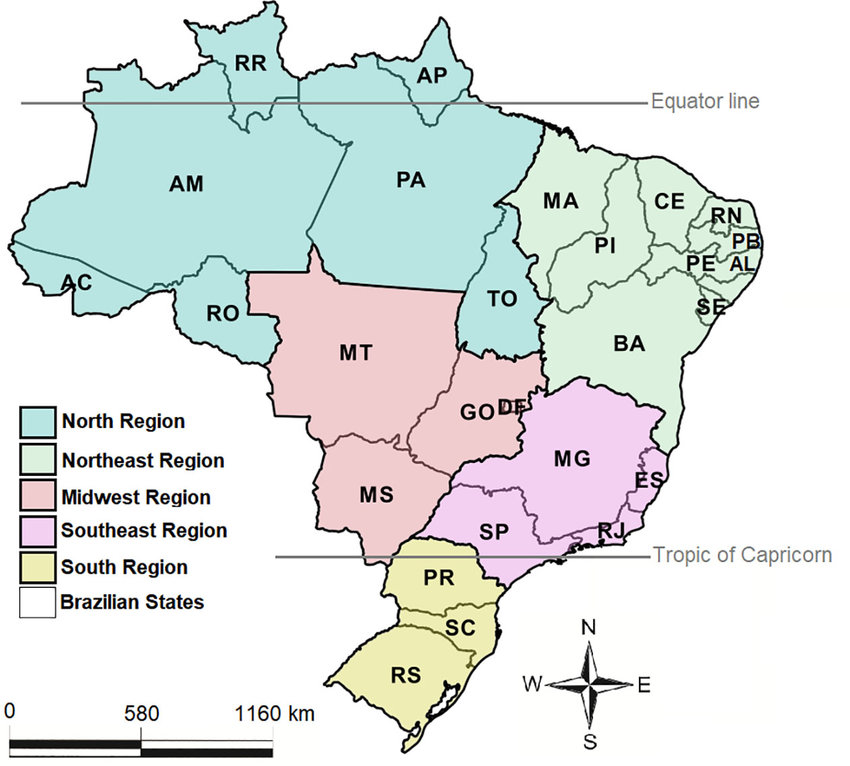

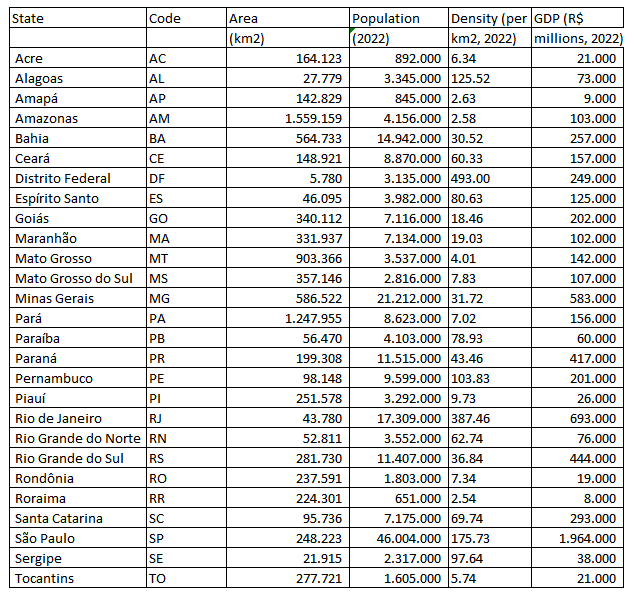

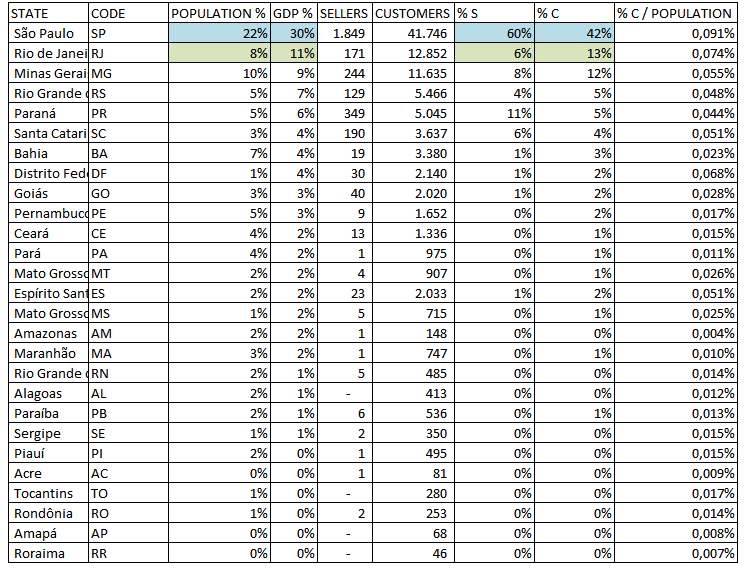